<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [3]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Time related functions.
import time
# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score, accuracy_score, precision_score, f1_score

# importing random
import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [4]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Neural Network Project/bank-1.csv')

## Data Overview

In [6]:
data.shape

(10000, 14)

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
data["Exited"].value_counts(1)

,proportion
Exited,
0,0.7963
1,0.2037


In [11]:
data.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [12]:
# checking for null values
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [13]:
data.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [14]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

In [15]:
# checking stat summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [16]:
data = data.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [17]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("-" * 50)

Unique values in Geography are :
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
--------------------------------------------------
Unique values in Gender are :
Gender
Male      5457
Female    4543
Name: count, dtype: int64
--------------------------------------------------


## Exploratory Data Analysis

### Univariate Analysis

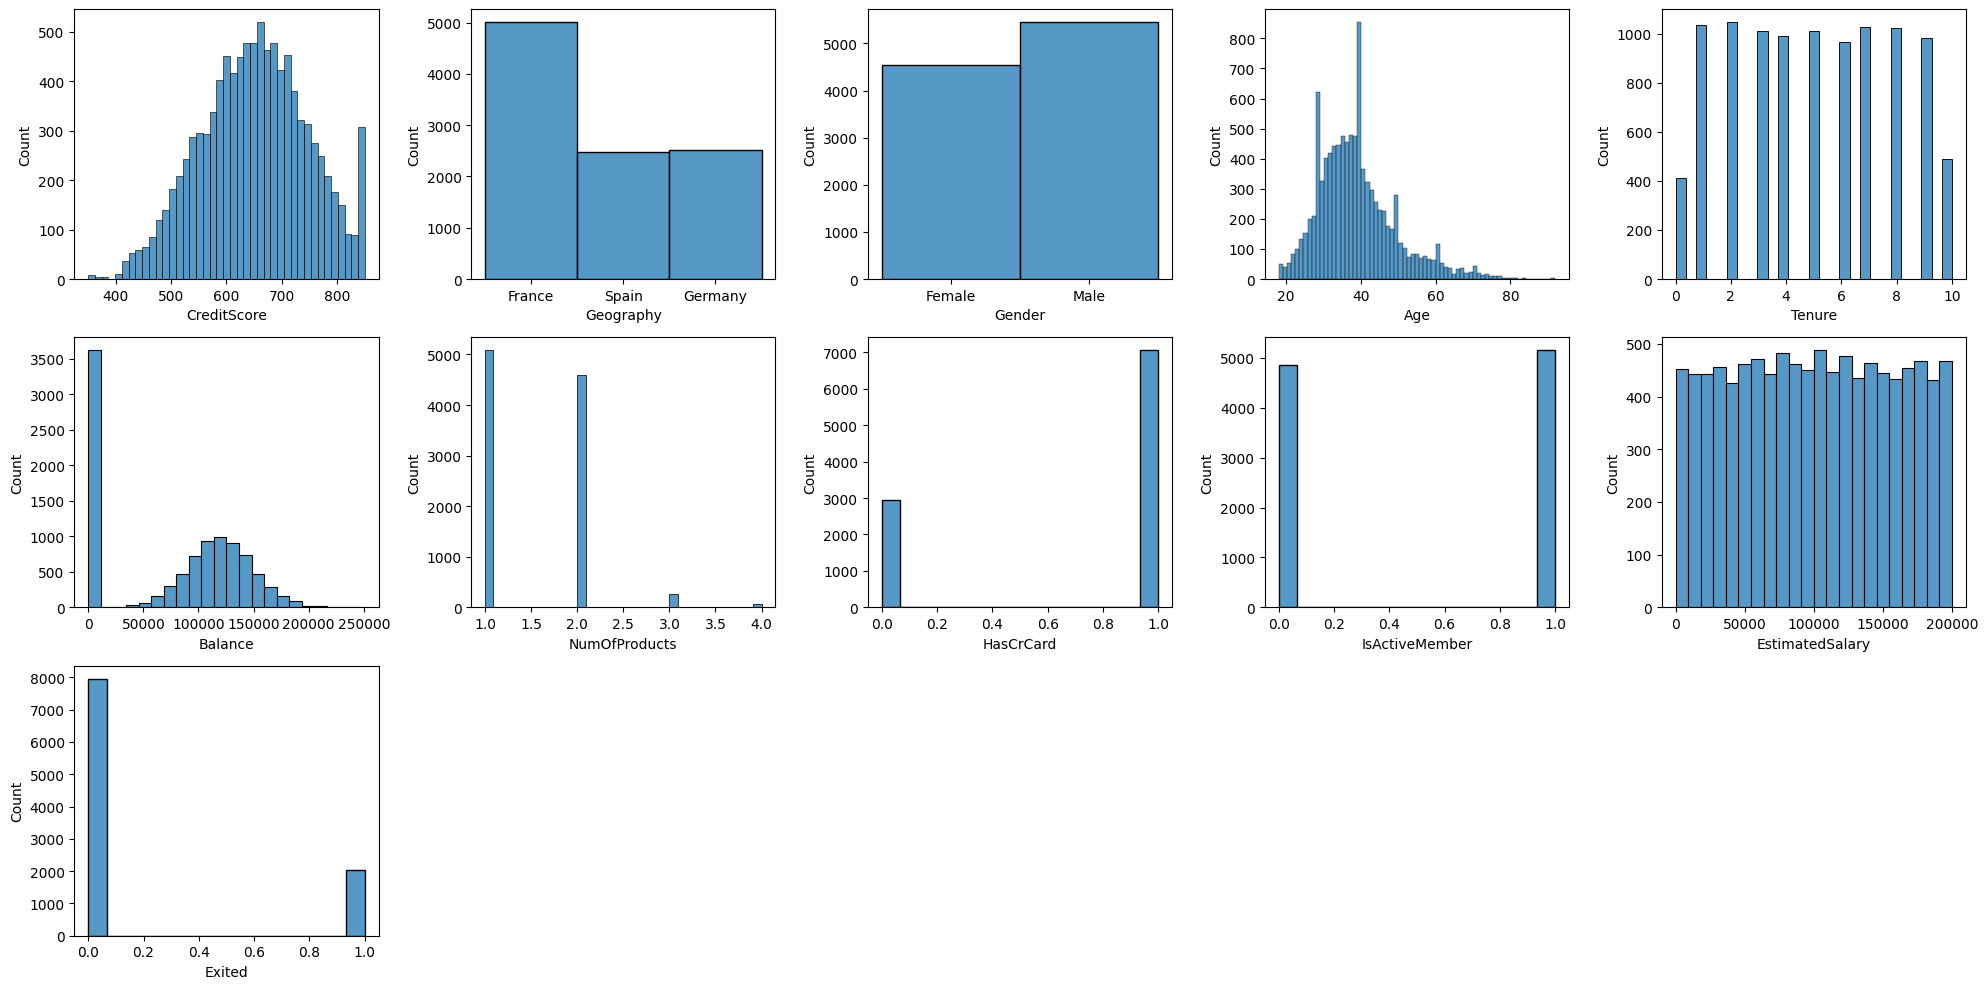

In [18]:
# defining the figure size
plt.figure(figsize=(20, 10))

# plotting the histogram for each numerical feature
for i, feature in enumerate(data.columns):
    plt.subplot(3, 5, i+1)    # assign a subplot in the main plot
    sns.histplot(data=data, x=feature)    # plot the histogram

plt.tight_layout();   # to add spacing between plots

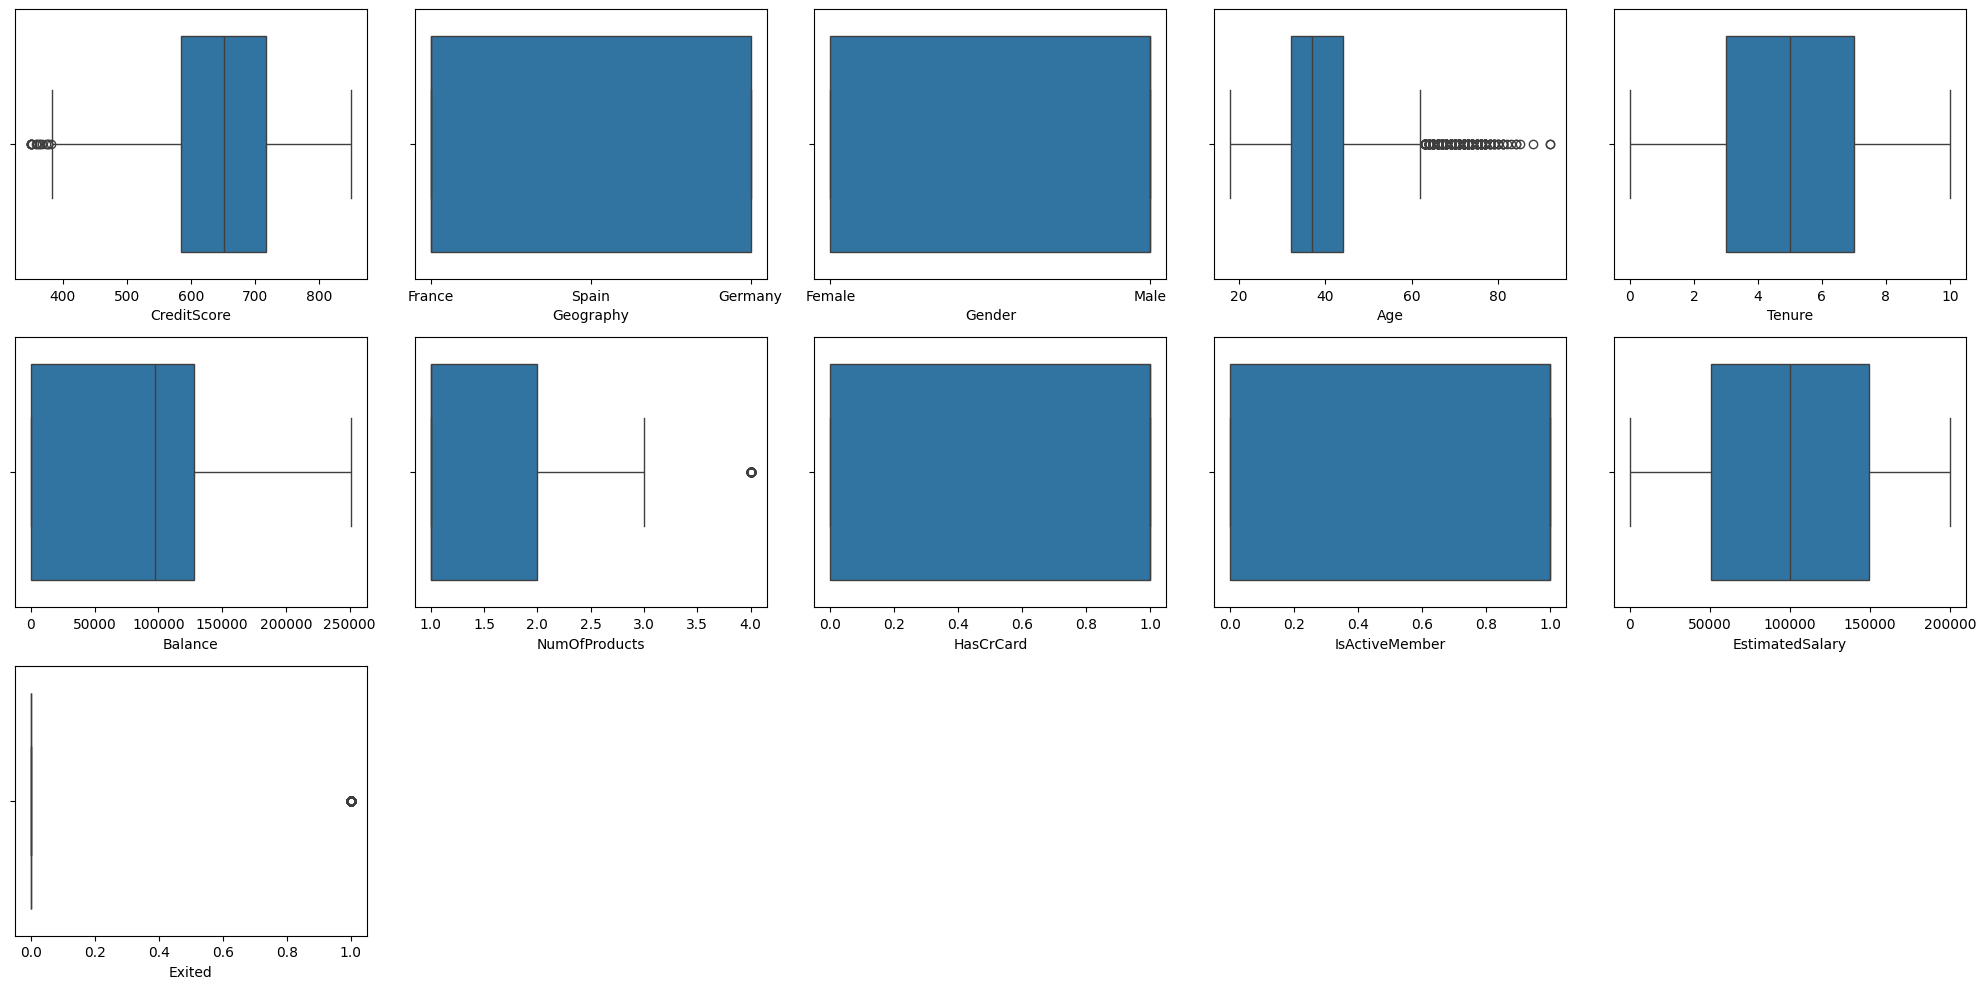

In [19]:
# defining the figure size
plt.figure(figsize=(20, 10))

# plotting the boxplot for each numerical feature
for i, feature in enumerate(data.columns):
    plt.subplot(3, 5, i+1)    # assign a subplot in the main plot
    sns.boxplot(data=data, x=feature)    # plot the boxplot

plt.tight_layout();   # to add spacing between plots

### Bivariate Analysis

In [20]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [21]:
# defining the list of numerical columns
columns = ["CreditScore","Age","Tenure","Balance",'NumOfProducts',"HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited"]

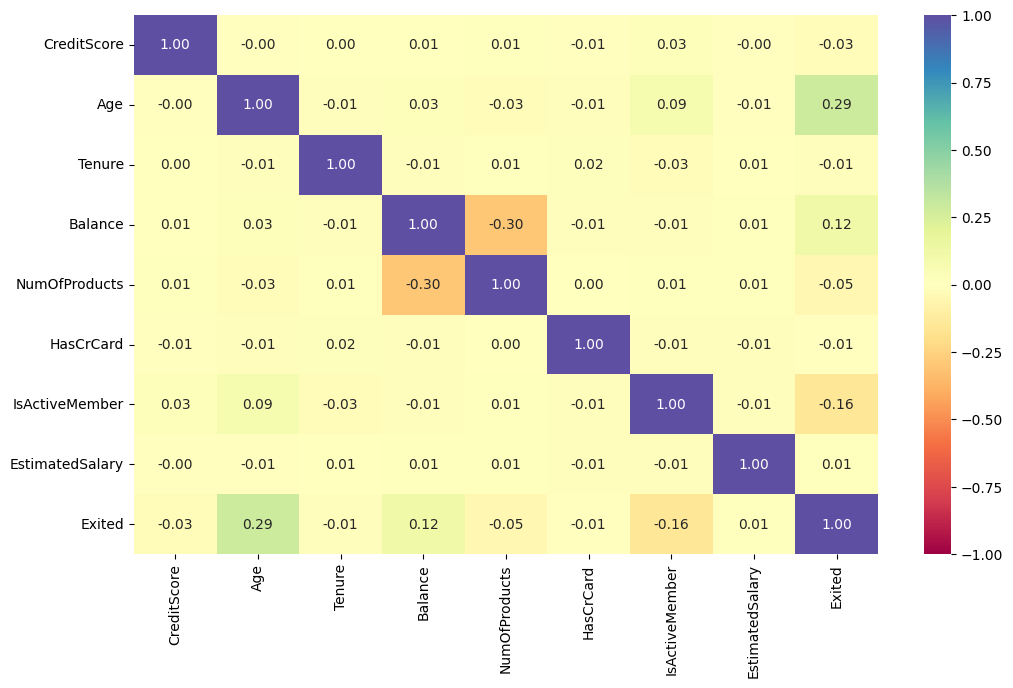

In [22]:
# defining the size of the plot
plt.figure(figsize=(12, 7))

# plotting the heatmap for correlation
sns.heatmap(
    data[columns].corr(),annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
);

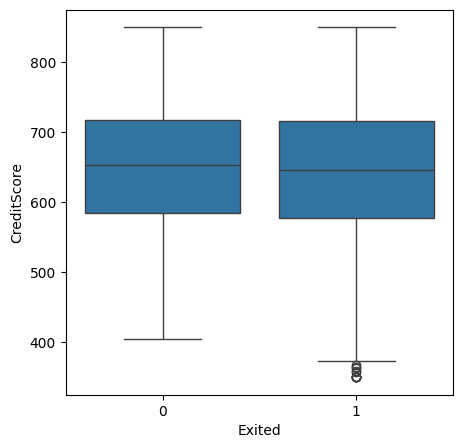

In [23]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=data)
plt.show()

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


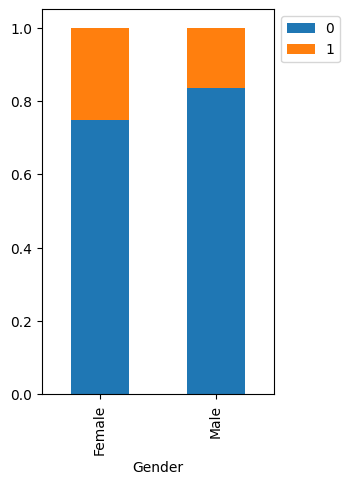

In [24]:
stacked_barplot(data, "Gender", "Exited")

Customer Exits by Geography
Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


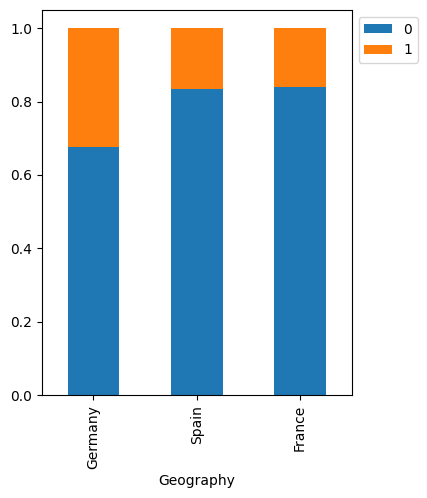

In [25]:
print("Customer Exits by Geography"),
stacked_barplot(data, "Geography", "Exited")

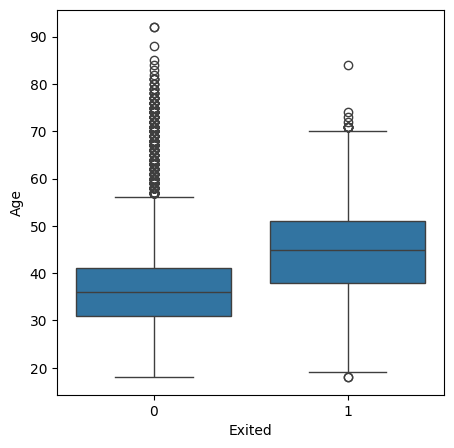

In [26]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=data)
plt.show()

*   Higher age of exiting customers  




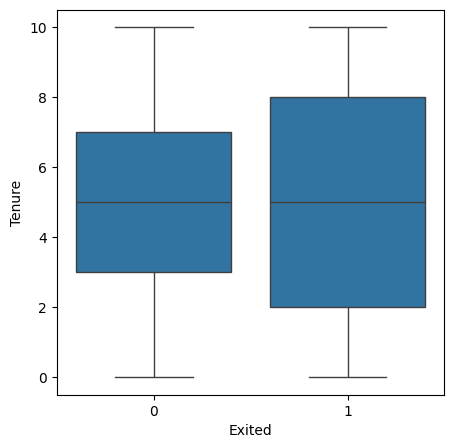

In [27]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=data)
plt.show()

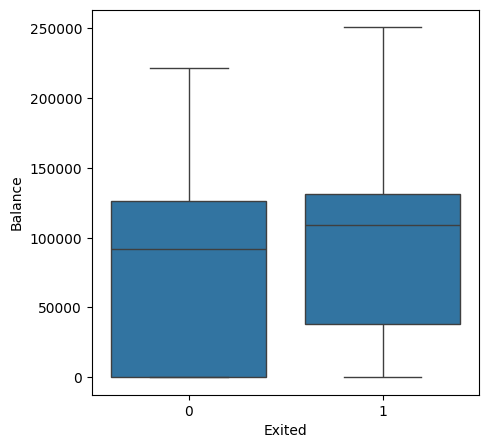

In [28]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=data)
plt.show()



*   Slightly higher balance for those exiting




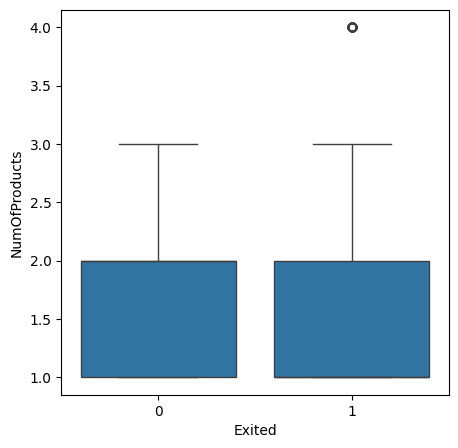

In [29]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=data)
plt.show()

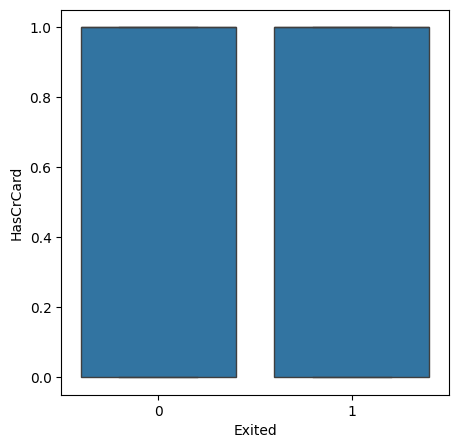

In [30]:
plt.figure(figsize=(5,5))
sns.boxplot(y='HasCrCard',x='Exited',data=data)
plt.show()

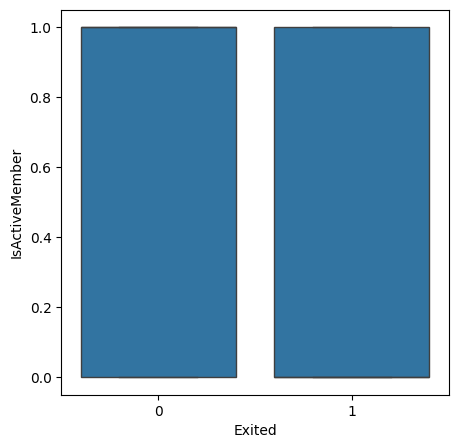

In [31]:
plt.figure(figsize=(5,5))
sns.boxplot(y='IsActiveMember',x='Exited',data=data)
plt.show()

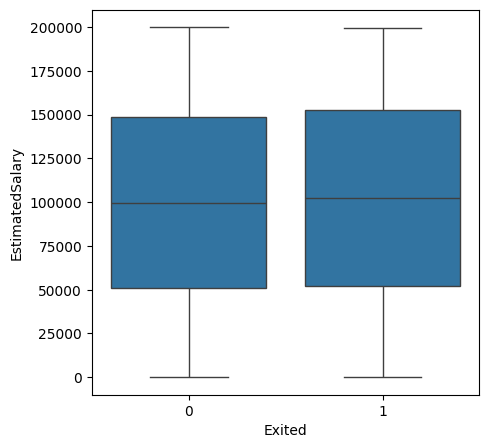

In [32]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=data)
plt.show()

## Data Preprocessing

### Dummy Variable Creation

In [33]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
## Separating Independent and Dependent Columns
X = data.drop(['Exited'],axis=1)
Y = data['Exited']

In [35]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [36]:
#Encoding the categorical variables using one-hot encoding
X = pd.get_dummies(
    X,columns=["Geography", "Gender"]
    ,drop_first=True
    )
X = X.astype(float)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,1.0,0.0


### Train-validation-test Split

### Data Normalization

In [37]:
transformer = StandardScaler()
X[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]] = transformer.fit_transform(X[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]])
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1.0,1.0,0.021886,0.0,0.0,0.0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.0,1.0,0.216534,0.0,1.0,0.0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1.0,0.0,0.240687,0.0,0.0,0.0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0.0,0.0,-0.108918,0.0,0.0,0.0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1.0,1.0,-0.365276,0.0,1.0,0.0


In [38]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42, stratify=Y)

In [39]:
# Splitting the dataset into the Training and Validation set.
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train,Y_train, test_size = 0.2, random_state = 42, stratify=Y_train)

In [40]:
#Printing the shapes.
print(X_train.shape,Y_train.shape)
print(X_valid.shape,Y_valid.shape)
print(X_test.shape,Y_test.shape)

(6400, 11) (6400,)
(1600, 11) (1600,)
(2000, 11) (2000,)


## Model Building

In [41]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-


In [42]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [43]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

### Neural Network with SGD Optimizer

In [44]:
tf.keras.backend.clear_session()


In [45]:
epochs = 25
batch_size = 64

In [46]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [47]:
#Initializing the neural network
model0 = Sequential()
model0.add(Dense(14, activation='relu', input_dim = X_train.shape[1]))
model0.add(Dense(7, activation='relu'))
model0.add(Dense(1, activation='sigmoid'))

In [48]:
model0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD()
model0.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['recall'])

In [50]:
# Fitting the ANN
start = time.time()
history0 = model0.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=batch_size, epochs=epochs, verbose=1 )
end = time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7620 - recall: 0.8124 - val_loss: 0.5887 - val_recall: 0.2086
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5732 - recall: 0.1387 - val_loss: 0.5123 - val_recall: 0.0399
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5153 - recall: 0.0163 - val_loss: 0.4873 - val_recall: 0.0123
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4962 - recall: 0.0080 - val_loss: 0.4780 - val_recall: 0.0061
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4878 - recall: 0.0063 - val_loss: 0.4728 - val_recall: 0.0061
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4822 - recall: 0.0063 - val_loss: 0.4690 - val_recall: 0.0061
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4775 - recall: 0.0063 - val_loss: 0.4656 - val_recall: 0.0061
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4731 - recall: 0.0044 - val_loss: 0.4625 - val_recall: 0.0061
Epoch 9/

In [51]:
print("Time taken in seconds ",end-start)

Time taken in seconds  14.281063556671143


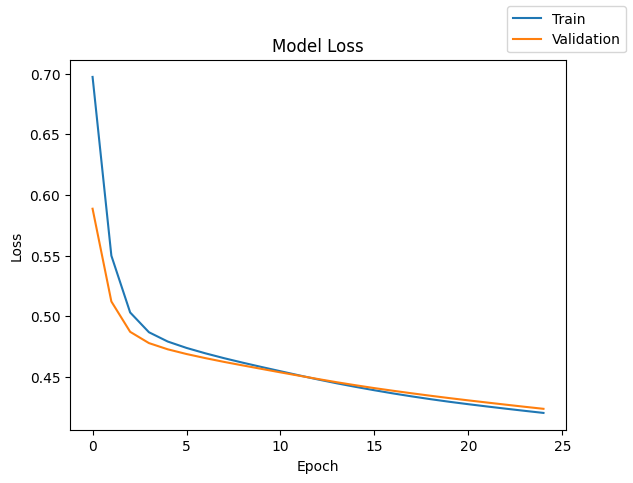

In [52]:
plot(history0,'loss')

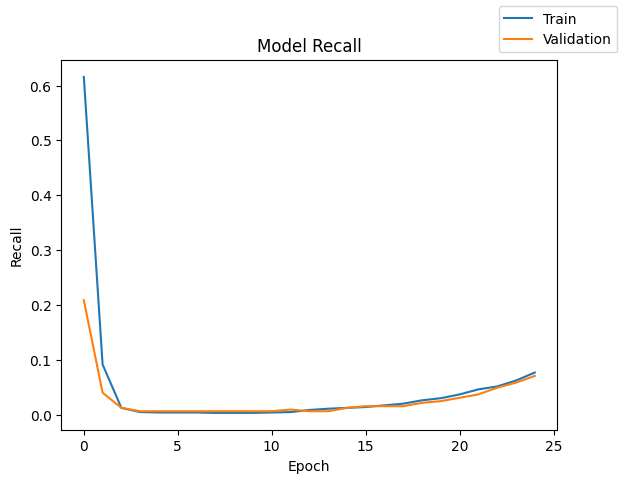

In [53]:
plot(history0,'recall')

In [54]:
model0_train_perf = model_performance_classification(model0, X_train, Y_train)
model0_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8025,0.8025,0.768853,0.736415


In [55]:
model0_valid_perf = model_performance_classification(model0, X_valid, Y_valid)
model0_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8,0.8,0.75875,0.73195


In [56]:
#Predicting the results using best as a threshold
Y_train_pred = model0.predict(X_train)
Y_train_pred = (Y_train_pred > 0.5)
Y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [57]:
#Predicting the results using best as a threshold
Y_val_pred = model0.predict(X_valid)
Y_val_pred = (Y_val_pred > 0.5)
Y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [58]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

model0_name = "NN with SGD"

train_metric_df.loc[model0_name] = recall_score(Y_train, Y_train_pred)
valid_metric_df.loc[model0_name] = recall_score(Y_valid, Y_val_pred)

In [59]:
#classification report
cr = classification_report(Y_train, Y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      5096
           1       0.62      0.08      0.14      1304

    accuracy                           0.80      6400
   macro avg       0.71      0.53      0.52      6400
weighted avg       0.77      0.80      0.74      6400



In [60]:
#classification report
cr = classification_report(Y_valid, Y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1274
           1       0.57      0.07      0.13       326

    accuracy                           0.80      1600
   macro avg       0.69      0.53      0.51      1600
weighted avg       0.76      0.80      0.73      1600



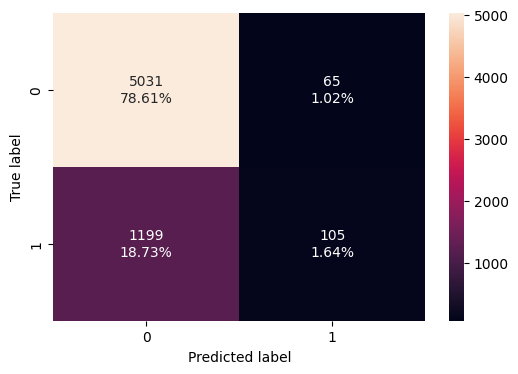

In [61]:
make_confusion_matrix(Y_train, Y_train_pred)

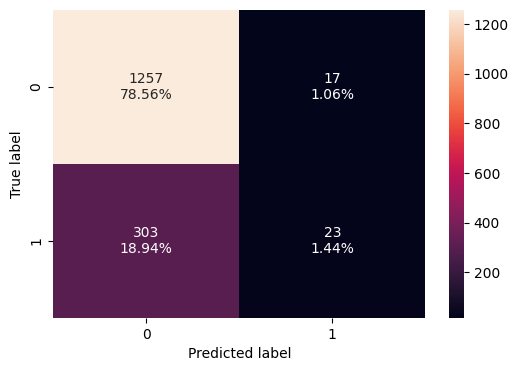

In [62]:
make_confusion_matrix(Y_valid, Y_val_pred)

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [63]:
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [64]:
model1 = Sequential()
model1.add(Dense(32,activation="relu",input_dim=X_train.shape[1]))
model1.add(Dense(16,activation="relu"))
model1.add(Dense(1,activation="sigmoid"))

In [65]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['recall'])

In [66]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
start = time.time()
history1 = model1.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=batch_size, epochs=epochs, verbose=1 )
end = time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5990 - recall: 0.1811 - val_loss: 0.4636 - val_recall: 0.0000e+00
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4470 - recall: 0.0174 - val_loss: 0.4368 - val_recall: 0.0767
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4196 - recall: 0.1591 - val_loss: 0.4163 - val_recall: 0.2147
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3990 - recall: 0.2954 - val_loss: 0.3981 - val_recall: 0.3098
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3821 - recall: 0.3525 - val_loss: 0.3849 - val_recall: 0.3834
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3699 - recall: 0.4004 - val_loss: 0.3763 - val_recall: 0.3926
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3618 - recall: 0.4308 - val_loss: 0.3713 - val_recall: 0.4080
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3563 - recall: 0.4464 - val_loss: 0.3681 - val_recall: 0.4233
Epoc

In [68]:
print("Time taken in seconds ",end-start)

Time taken in seconds  14.676941633224487


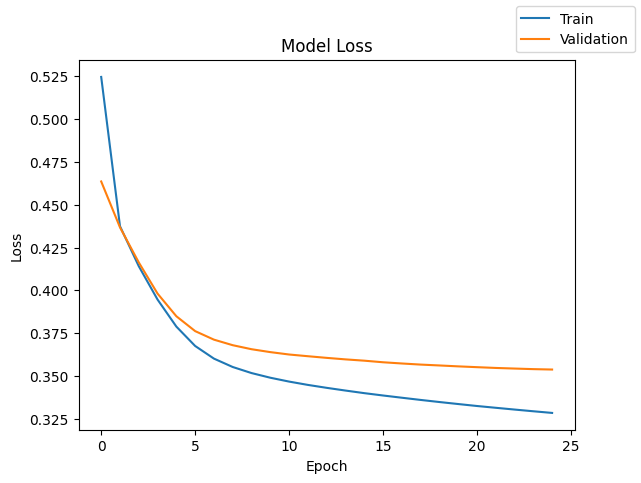

In [69]:
plot(history1,'loss')

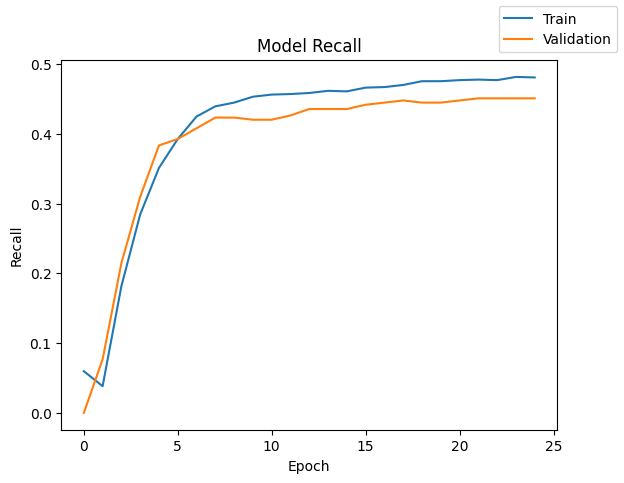

In [70]:
plot(history1,'recall')

In [71]:
model1_train_perf = model_performance_classification(model1, X_train, Y_train)
model1_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.863906,0.863906,0.854862,0.854299


In [72]:
model1_valid_perf = model_performance_classification(model1, X_valid, Y_valid)
model1_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.85375,0.85375,0.842572,0.83997


In [73]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [74]:
#Predicting the results using best as a threshold
Y_val_pred = model1.predict(X_valid)
Y_val_pred = (Y_val_pred > 0.5)
Y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [75]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

model1_name = "NN with Adam Optimizer"

train_metric_df.loc[model1_name] = recall_score(Y_train, Y_train_pred)
valid_metric_df.loc[model1_name] = recall_score(Y_valid, Y_val_pred)

In [76]:
#classification report training
cr = classification_report(Y_train, Y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      5096
           1       0.62      0.08      0.14      1304

    accuracy                           0.80      6400
   macro avg       0.71      0.53      0.52      6400
weighted avg       0.77      0.80      0.74      6400



In [77]:
#classification report validation
cr = classification_report(Y_valid, Y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1274
           1       0.73      0.45      0.56       326

    accuracy                           0.85      1600
   macro avg       0.80      0.70      0.73      1600
weighted avg       0.84      0.85      0.84      1600



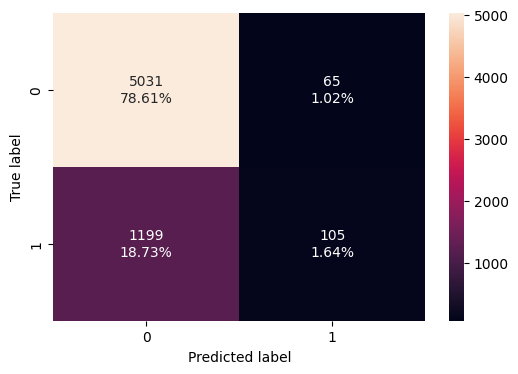

In [78]:
make_confusion_matrix(Y_train, Y_train_pred)

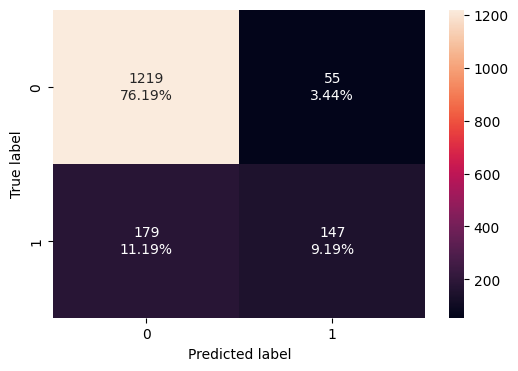

In [79]:
make_confusion_matrix(Y_valid, Y_val_pred)

### Neural Network with Adam Optimizer and Dropout

In [80]:
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [81]:
#Initializing the neural network
model2 = Sequential()
model2.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model2.add(Dropout(0.4))
model2.add(Dense(7,activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation="sigmoid"))

In [82]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model2.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['recall'])

In [84]:
start = time.time()
history2 = model2.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=batch_size, epochs=epochs, verbose=1 )
end = time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.7712 - recall: 0.4365 - val_loss: 0.5379 - val_recall: 0.0798
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5620 - recall: 0.1372 - val_loss: 0.4933 - val_recall: 0.0245
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5363 - recall: 0.0597 - val_loss: 0.4777 - val_recall: 0.0092
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5120 - recall: 0.0378 - val_loss: 0.4672 - val_recall: 0.0061
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5040 - recall: 0.0256 - val_loss: 0.4588 - val_recall: 0.0061
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4804 - recall: 0.0274 - val_loss: 0.4518 - val_recall: 0.0031
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4740 - recall: 0.0406 - val_loss: 0.4470 - val_recall: 0.0061
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4640 - recall: 0.0339 - val_loss: 0.4436 - val_recall: 0.0061
Epoch 9

In [85]:
print("Time taken in seconds ",end-start)

Time taken in seconds  18.16285729408264


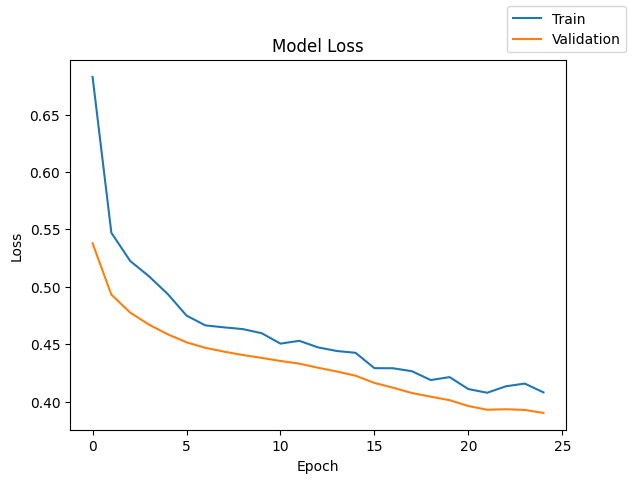

In [86]:
plot(history2,'loss')

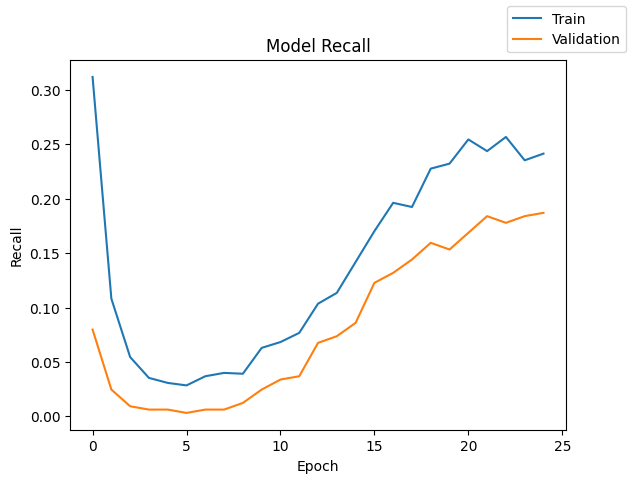

In [87]:
plot(history2,'recall')

In [88]:
model2_train_perf = model_performance_classification(model2, X_train, Y_train)
model2_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.843906,0.843906,0.855405,0.80658


In [89]:
model2_valid_perf = model_performance_classification(model2, X_valid, Y_valid)
model2_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.83125,0.83125,0.847011,0.783099


In [90]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [91]:
#Predicting the results using best as a threshold
Y_val_pred = model2.predict(X_valid)
Y_val_pred = (Y_val_pred > 0.5)
Y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [92]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])
model2_name = "NN with Adam Optimizer and Dropout"
train_metric_df.loc[model2_name] = recall_score(Y_train, Y_train_pred)
valid_metric_df.loc[model2_name] = recall_score(Y_valid, Y_val_pred)

In [93]:
#classification report training
cr = classification_report(Y_train, Y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      5096
           1       0.62      0.08      0.14      1304

    accuracy                           0.80      6400
   macro avg       0.71      0.53      0.52      6400
weighted avg       0.77      0.80      0.74      6400



In [94]:
#classification report validation
cr = classification_report(Y_valid, Y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      1.00      0.90      1274
           1       0.92      0.19      0.31       326

    accuracy                           0.83      1600
   macro avg       0.88      0.59      0.61      1600
weighted avg       0.85      0.83      0.78      1600



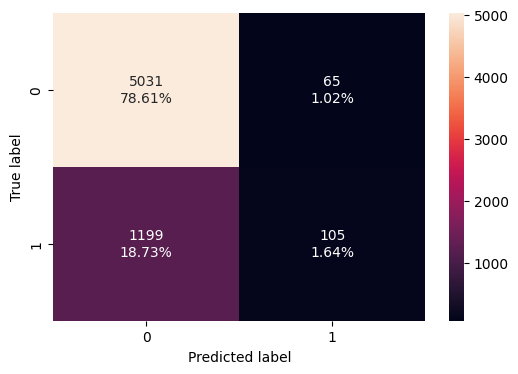

In [95]:
make_confusion_matrix(Y_train, Y_train_pred)

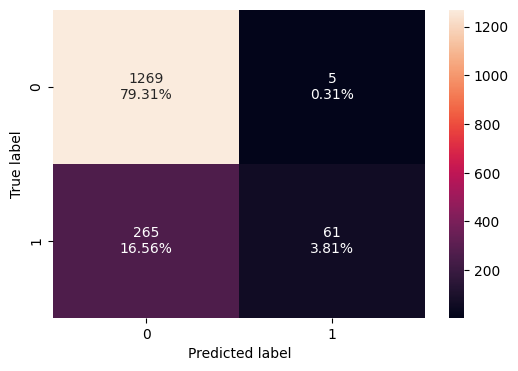

In [96]:
make_confusion_matrix(Y_valid, Y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [97]:
sm  = SMOTE(random_state=42)
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train, Y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



In [98]:
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [99]:
#Initializing the model
model3 = Sequential()
model3.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model3.add(Dense(7,activation="relu"))
model3.add(Dense(1,activation="sigmoid"))
model3.add(Dense(1,activation="sigmoid"))

In [100]:
optimizer = tf.keras.optimizers.SGD(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['recall'])

In [101]:
model3.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283 (1.11 KB)

 Trainable params: 283 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
start = time.time()
history3 = model3.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=batch_size, epochs=epochs, verbose=1 )
end = time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7672 - recall: 1.0000 - val_loss: 0.7551 - val_recall: 1.0000
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7506 - recall: 1.0000 - val_loss: 0.7392 - val_recall: 1.0000
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7352 - recall: 1.0000 - val_loss: 0.7244 - val_recall: 1.0000
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7209 - recall: 0.9999 - val_loss: 0.7106 - val_recall: 0.9969
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7076 - recall: 0.9876 - val_loss: 0.6978 - val_recall: 0.8865
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6952 - recall: 0.7712 - val_loss: 0.6859 - val_recall: 0.2454
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6836 - recall: 0.1585 - val_loss: 0.6748 - val_recall: 0.0061
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6729 - recall: 0.0025 - val_loss: 0.6644 - val_recall: 0.0000e+00
Epoc

In [103]:
print("Time taken in seconds ",end-start)

Time taken in seconds  18.830223560333252


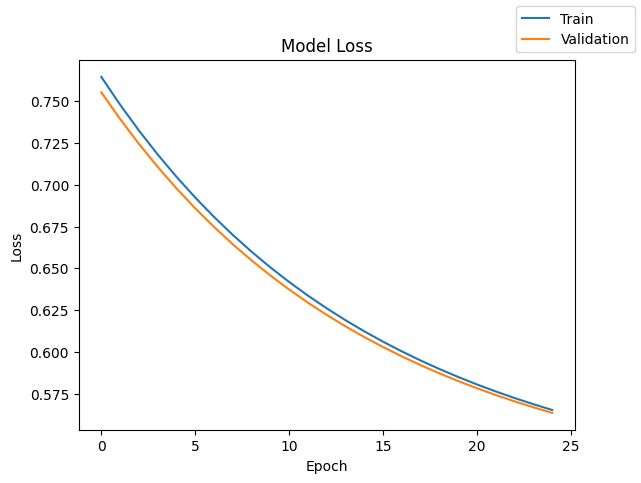

In [104]:
plot(history3,'loss')

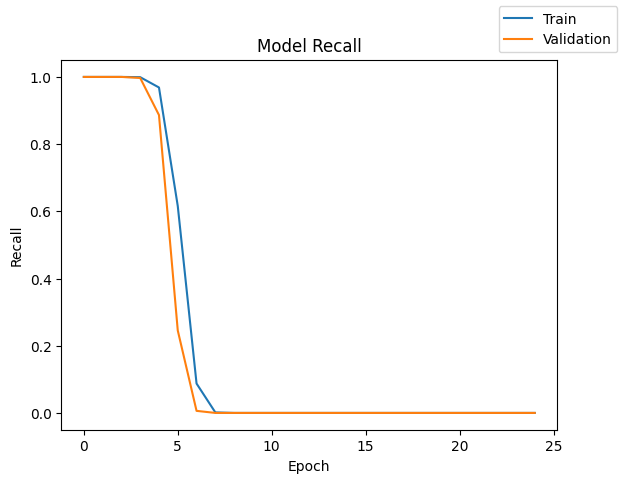

In [105]:
plot(history3,'recall')

In [106]:
model3_train_perf = model_performance_classification(model3, X_train, Y_train)
model3_train_perf


200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.79625,0.79625,0.634014,0.705931


In [107]:
model3_valid_perf = model_performance_classification(model3, X_valid, Y_valid)
model3_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.79625,0.79625,0.634014,0.705931


In [108]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model3.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [109]:
#Predicting the results using best as a threshold
Y_val_pred = model3.predict(X_valid)
Y_val_pred = (Y_val_pred > 0.5)
Y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [110]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])
model3_name = "NN with Balanced Data (by applying SMOTE) and SGD Optimizer"
train_metric_df.loc[model3_name] = recall_score(Y_train, Y_train_pred)
valid_metric_df.loc[model3_name] = recall_score(Y_valid, Y_val_pred)

In [111]:
#classification report training
cr = classification_report(Y_train, Y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      5096
           1       0.62      0.08      0.14      1304

    accuracy                           0.80      6400
   macro avg       0.71      0.53      0.52      6400
weighted avg       0.77      0.80      0.74      6400



In [112]:
#classification report validation
cr = classification_report(Y_valid, Y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1274
           1       0.00      0.00      0.00       326

    accuracy                           0.80      1600
   macro avg       0.40      0.50      0.44      1600
weighted avg       0.63      0.80      0.71      1600



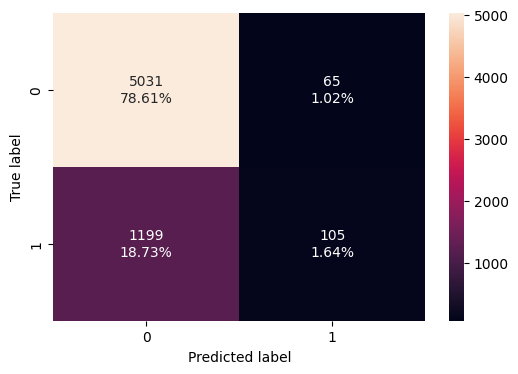

In [113]:
make_confusion_matrix(Y_train, Y_train_pred)

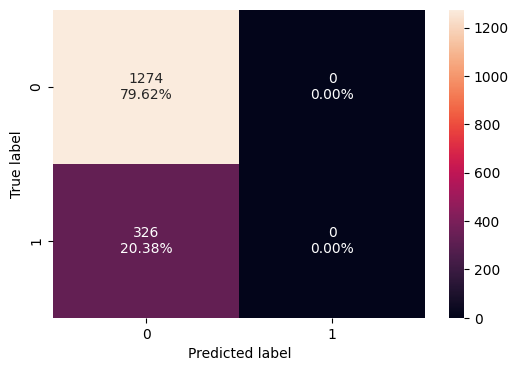

In [114]:
make_confusion_matrix(Y_valid, Y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [115]:
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [116]:
sm  = SMOTE(random_state=42)
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train, Y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



In [117]:
#Initializing the neural network
model4 = Sequential()
model4.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model4.add(Dense(7,activation="relu"))
model4.add(Dense(1,activation="sigmoid"))

In [118]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used

In [119]:
model4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['recall'])
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [120]:
start = time.time()
history4 = model4.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=batch_size, epochs=epochs, verbose=1 )
end = time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.7438 - recall: 0.7615 - val_loss: 0.5369 - val_recall: 0.0828
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5195 - recall: 0.0502 - val_loss: 0.4691 - val_recall: 0.0184
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4686 - recall: 0.0101 - val_loss: 0.4501 - val_recall: 0.0245
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4462 - recall: 0.0390 - val_loss: 0.4333 - val_recall: 0.0920
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4263 - recall: 0.1346 - val_loss: 0.4179 - val_recall: 0.1871
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4091 - recall: 0.2456 - val_loss: 0.4036 - val_recall: 0.2883
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3945 - recall: 0.3282 - val_loss: 0.3919 - val_recall: 0.3405
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3833 - recall: 0.3628 - val_loss: 0.3837 - val_recall: 0.3589
Epoch 9/

In [121]:
print("Time taken in seconds ",end-start)

Time taken in seconds  16.011909246444702


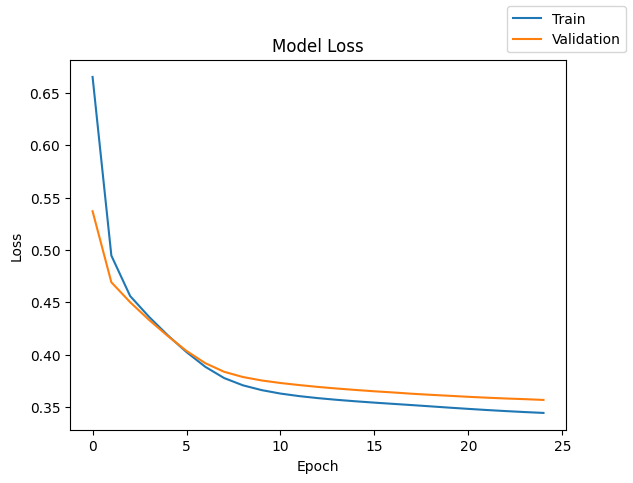

In [122]:
plot(history4,'loss')

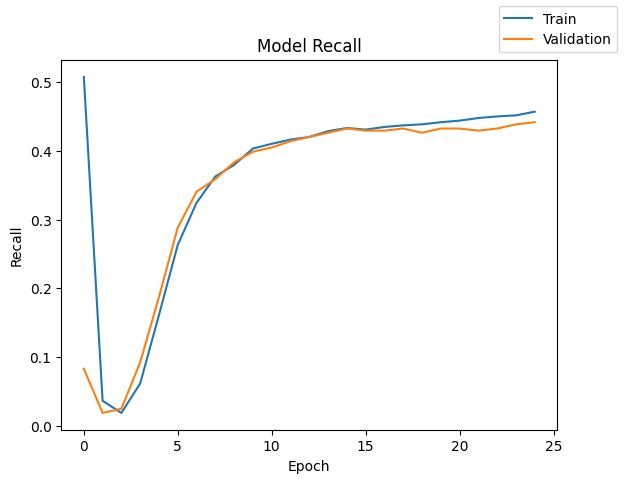

In [123]:
plot(history4,'recall')

In [124]:
model4_train_perf = model_performance_classification(model4, X_train, Y_train)
model4_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.859688,0.859688,0.849821,0.847693


In [125]:
model4_valid_perf = model_performance_classification(model4, X_valid, Y_valid)
model4_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.856875,0.856875,0.847011,0.841789


In [126]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model4.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [127]:
#Predicting the results using best as a threshold
Y_val_pred = model4.predict(X_valid)
Y_val_pred = (Y_val_pred > 0.5)
Y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [128]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])
model4_name = "NN with Balanced Data (by applying SMOTE) and Adam Optimizer"
train_metric_df.loc[model4_name] = recall_score(Y_train, Y_train_pred)
valid_metric_df.loc[model4_name] = recall_score(Y_valid, Y_val_pred)

In [129]:
#classification report training
cr = classification_report(Y_train, Y_train_pred)
print(cr)


              precision    recall  f1-score   support

           0       0.81      0.99      0.89      5096
           1       0.62      0.08      0.14      1304

    accuracy                           0.80      6400
   macro avg       0.71      0.53      0.52      6400
weighted avg       0.77      0.80      0.74      6400



In [130]:
#classification report validation
cr = classification_report(Y_valid, Y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1274
           1       0.75      0.44      0.56       326

    accuracy                           0.86      1600
   macro avg       0.81      0.70      0.74      1600
weighted avg       0.85      0.86      0.84      1600



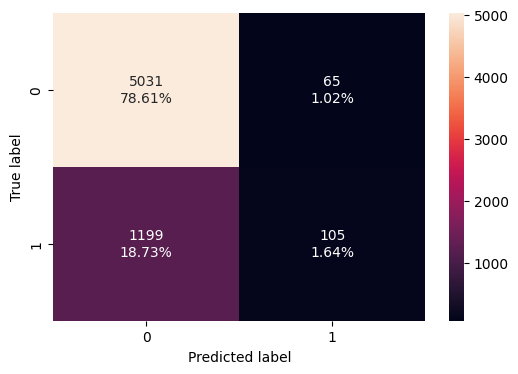

In [131]:
make_confusion_matrix(Y_train, Y_train_pred)

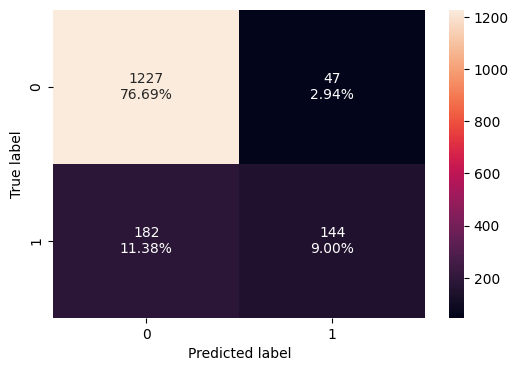

In [132]:
make_confusion_matrix(Y_valid, Y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [133]:
tf.keras.backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [134]:
#Initializing the model
model5 = Sequential()
# Complete the code to add required # of neurons to the input layer with relu as activation function
model5.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add dropout rate
model5.add(Dropout(0.4))
# Complete the code to add required # neurons to the hidden layer with any activation function.
model5.add(Dense(16,activation='relu',input_dim = X_train_smote.shape[1]))
# Complete the code to add dropout rate.
model5.add(Dropout(0.2))
# Adding hidden layer with 8 neurons with relu as activation function
model5.add(Dense(8,activation='relu',input_dim = X_train_smote.shape[1]))
# Complete the code to add the required number of neurons in the output layer with a suitable activation function.
model5.add(Dense(1, activation = 'sigmoid', input_dim = X_train_smote.shape[1]))

In [135]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['recall'])
model5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [136]:
start = time.time()
history5 = model5.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=batch_size, epochs=epochs, verbose=1 )
end = time.time()


Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5843 - recall: 0.2102 - val_loss: 0.4707 - val_recall: 0.0000e+00
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4806 - recall: 0.0011 - val_loss: 0.4496 - val_recall: 0.0000e+00
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4601 - recall: 0.0063 - val_loss: 0.4371 - val_recall: 0.0092
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4524 - recall: 0.0578 - val_loss: 0.4264 - val_recall: 0.0460
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4470 - recall: 0.1204 - val_loss: 0.4184 - val_recall: 0.1104
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4366 - recall: 0.1490 - val_loss: 0.4090 - val_recall: 0.1534
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4284 - recall: 0.2059 - val_loss: 0.4026 - val_recall: 0.1810
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4214 - recall: 0.2156 - val_loss: 0.3943 - val_recall: 0.2178


In [137]:
print("Time taken in seconds ",end-start)

Time taken in seconds  15.318762302398682


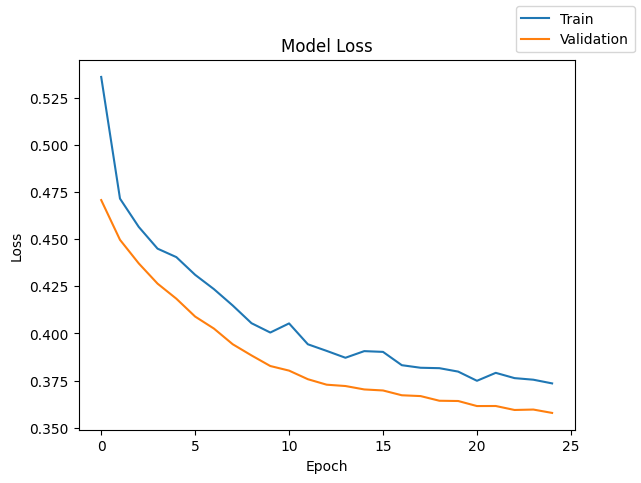

In [138]:
plot(history5,'loss')

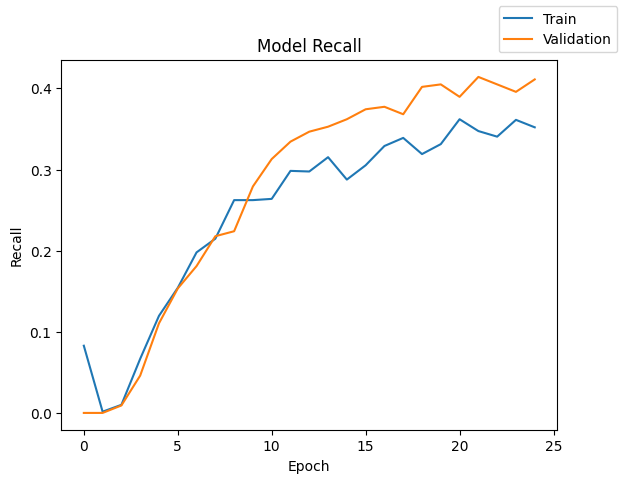

In [139]:
plot(history5,'recall')

In [140]:
model5_train_perf = model_performance_classification(model5, X_train, Y_train)
model5_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.86,0.86,0.851645,0.84428


In [141]:
model5_valid_perf = model_performance_classification(model5, X_valid, Y_valid)
model5_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8525,0.8525,0.842124,0.834892


In [142]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model5.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [143]:
#Predicting the results using best as a threshold
Y_val_pred = model5.predict(X_valid)
Y_val_pred = (Y_val_pred > 0.5)
Y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [144]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])
model5_name = "NN  with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout"
train_metric_df.loc[model5_name] = recall_score(Y_train, Y_train_pred)
valid_metric_df.loc[model5_name] = recall_score(Y_valid, Y_val_pred)

In [145]:
#classification report training
cr = classification_report(Y_train, Y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      5096
           1       0.62      0.08      0.14      1304

    accuracy                           0.80      6400
   macro avg       0.71      0.53      0.52      6400
weighted avg       0.77      0.80      0.74      6400



In [146]:
#classification report validation
cr = classification_report(Y_valid, Y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1274
           1       0.75      0.41      0.53       326

    accuracy                           0.85      1600
   macro avg       0.81      0.69      0.72      1600
weighted avg       0.84      0.85      0.83      1600



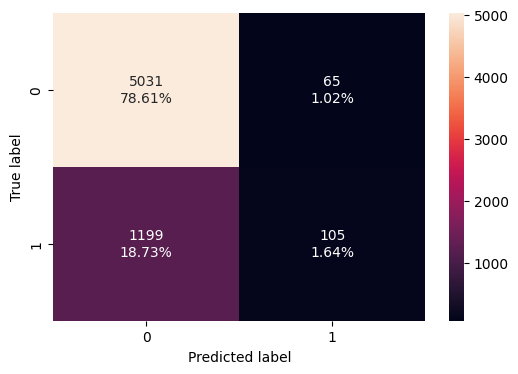

In [147]:
make_confusion_matrix(Y_train, Y_train_pred)

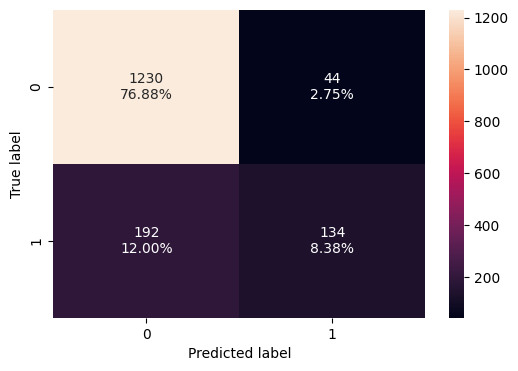

In [148]:
make_confusion_matrix(Y_valid, Y_val_pred)

## Model Performance Comparison and Final Model Selection

In [149]:
# training performance comparison
print("Training performance comparison")

models_train_comp_df = pd.concat(
    [
        model0_train_perf.T,
        model1_train_perf.T,
        model2_train_perf.T,
        model3_train_perf.T,
        model4_train_perf.T,
        model5_train_perf.T
    ],
    axis=1,)
models_train_comp_df.columns = [
      model0_name,
      model1_name,
      model2_name,
      model3_name,
      model4_name,
      model5_name
]
models_train_comp_df


Training performance comparison


,NN with SGD,NN with Adam Optimizer,NN with Adam Optimizer and Dropout,NN with Balanced Data (by applying SMOTE) and SGD Optimizer,NN with Balanced Data (by applying SMOTE) and Adam Optimizer,"NN with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout"
Accuracy,0.802500,0.863906,0.843906,0.796250,0.859688,0.860000
Recall,0.802500,0.863906,0.843906,0.796250,0.859688,0.860000
Precision,0.768853,0.854862,0.855405,0.634014,0.849821,0.851645
F1 Score,0.736415,0.854299,0.806580,0.705931,0.847693,0.844280


In [150]:
print("Validation set performance comparison")


models_valid_comp_df = pd.concat(
    [
        model0_valid_perf.T,
        model1_valid_perf.T,
        model2_valid_perf.T,
        model3_valid_perf.T,
        model4_valid_perf.T,
        model5_valid_perf.T,
    ],
    axis=1,)
models_valid_comp_df.columns = [
      model0_name,
      model1_name,
      model2_name,
      model3_name,
      model4_name,
      model5_name
]
models_valid_comp_df

Validation set performance comparison


,NN with SGD,NN with Adam Optimizer,NN with Adam Optimizer and Dropout,NN with Balanced Data (by applying SMOTE) and SGD Optimizer,NN with Balanced Data (by applying SMOTE) and Adam Optimizer,"NN with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout"
Accuracy,0.80000,0.853750,0.831250,0.796250,0.856875,0.852500
Recall,0.80000,0.853750,0.831250,0.796250,0.856875,0.852500
Precision,0.75875,0.842572,0.847011,0.634014,0.847011,0.842124
F1 Score,0.73195,0.839970,0.783099,0.705931,0.841789,0.834892


In [151]:
  print("Training - Validation")

  models_diff_comp_df = pd.concat(
    [
        model0_train_perf.T - model0_valid_perf.T,
        model1_train_perf.T - model1_valid_perf.T,
        model2_train_perf.T - model2_valid_perf.T,
        model3_train_perf.T - model3_valid_perf.T,
        model4_train_perf.T - model4_valid_perf.T,
        model5_train_perf.T - model5_valid_perf.T
    ],
    axis=1,)
  models_diff_comp_df.columns = [
      model0_name,
      model1_name,
      model2_name,
      model3_name,
      model4_name,
      model5_name
]
models_diff_comp_df




Training - Validation


,NN with SGD,NN with Adam Optimizer,NN with Adam Optimizer and Dropout,NN with Balanced Data (by applying SMOTE) and SGD Optimizer,NN with Balanced Data (by applying SMOTE) and Adam Optimizer,"NN with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout"
Accuracy,0.002500,0.010156,0.012656,0.0,0.002812,0.007500
Recall,0.002500,0.010156,0.012656,0.0,0.002812,0.007500
Precision,0.010103,0.012290,0.008393,0.0,0.002810,0.009521
F1 Score,0.004466,0.014329,0.023481,0.0,0.005904,0.009388


In [152]:
y_test_pred = model5.predict(X_test)    ## Complete the code to specify the best model
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [153]:
#lets print classification report
cr=classification_report(Y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.80      0.45      0.58       407

    accuracy                           0.87      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



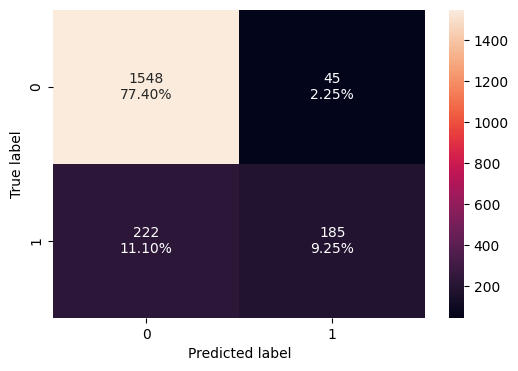

In [154]:
#Calculating the confusion matrix
make_confusion_matrix(Y_test,y_test_pred)

## Actionable Insights and Business Recommendations

#### The Banks Marketing Department can deploy the following model to identify with a reasonable degree of accuracy whehter a customer is likely to exit or not.
* NN with Balanced Data (by applying SMOTE) and Adam Optimizer
* Highest Validation Recall = 0.856875
* Lowest Training and Validation difference = 0.002812 signals no overfitting
* Introduce techniques to oversample minority classes, using appropriate evaluation metrics (e.g., F1-score), or employing ensemble methods like SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance. Ensuring a balanced dataset is crucial for model training to avoid biased predictions.

#### The bank should engage customers at risk of exiting with surveys to gather feedback on what they need to continue banking.  Introduce products and marketing promotions based on feedback that target the demographics that have a higher probablity of exiting the bank.
*   Marketing surveys for feedback to improve services and products for female customers at risk of exiting.  Build out marketing promos and inroduce new products to cater to those needs.
*   Introduce incentives to German customers to increase retention to similar rates in SPain and France.
*   Intorduce new products that interest bank customers in their Mid Fourties to promote retention.





<font size=6 color='blue'>Power Ahead</font>
___